In [3]:
import numpy as np
import math
import scipy
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm, uniform, chi2

In [4]:
N=100
t=[5,8,6,12,14,18,11,6,13,7]
a=0.05

In [5]:
# а) сравнение критерий согласия Колмагорова и крит согласия Пирсона 

In [6]:
mas=[]
for i in range (len(t)):
      mas.extend([i for j in range(t[i])])
#эмперическая функция распределенияx
x=np.linspace(0, 9, 100)
empirical=[np.sum(mas<i)/N for i in x]
e=empirical
#функция равномерного з-на распределения
f_t=[i/10 for  i in x]

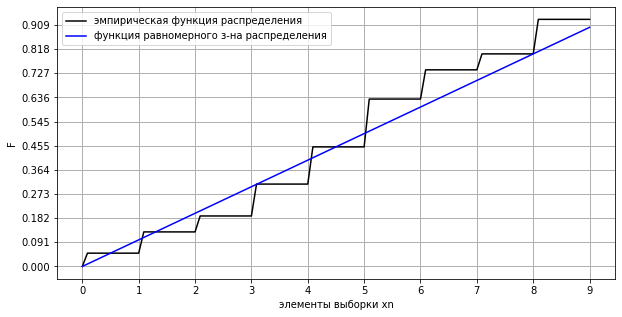

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(which="major",linewidth = 1 )
ax.set_xticks(np.linspace(0, 10, 11))
ax.set_yticks(np.linspace(0, 1, 12))
ax.set_xlabel('элементы выборки xn')
ax.set_ylabel('F')
plt.plot(x,e, color = 'black', label ='эмпирическая функция распределения')
plt.plot (x, f_t, color = 'blue', label ='функция равномерного з-на распределения')
ax.legend()
plt.show()

In [8]:
c=[0]*len(f_t)
def count_m(x,y):
        for i in range(len(f_t)):
            c[i]=abs(x[i]-y[i])
        return c

In [9]:
delta_w=N**0.5*max(count_m(f_t, e))
print('дельта с волной крит Колмагорова:', round(delta_w,5))

дельта с волной крит Колмагорова: 1.30909


In [10]:
s=0
for i in range(1, 6): 
    s+=-2*(-1)**i * np.exp(-2 * i ** (2) * delta_w ** 2 ) 
p_value=s
print('p_value = ', round(p_value,5))

p_value =  0.06494


In [11]:
flag=-1
if (p_value<a):
    print("a=", a)
    print("p_value<a")
    print("H0 отвергается ")
    flag=0
if (p_value>a):
    print("a=", a)
    print("p_value>a")
    print("нет оснований отвергнуть H0")
    flag=1 # по критерию согласия Пирсона: нет оснований отвергнуть H0

a= 0.05
p_value>a
нет оснований отвергнуть H0


In [12]:
if flag==1:
    print("результаты критерия согласия Пирсона и критерия Колмагорова одинаковые")
else:
    print("результаты критерия согласия Пирсона и критерия Колмагорова различны")

результаты критерия согласия Пирсона и критерия Колмагорова одинаковые


In [13]:
#b) проверить гипотезу о согласии данных с законом нормального распределения (кр Пирсона и кр Колмагорова). 
#сравнить результаты 

In [14]:
#Оценка параметров для нормального распределения по выборке

In [15]:
def gauss_rule(x,mean,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2) )

In [16]:
bound=[i/10 for i in range(5, 86, 10)]# разбиение
bound.insert(0, -np.inf) #добавляем -np.inf 
bound.append(np.inf)
print(bound)
s=np.linspace(1,8,100)
m=np.linspace(1,8,100)

[-inf, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, inf]


In [17]:
def param_maxim(t):
    L_max=0 #максимизация функции правдоподобия 
    p_max=[0]*2
    for sigma in s:
        for mean in m:
            l=1
            for i in range(len(bound) - 1):
                l*= quad(gauss_rule, bound[i], bound[i+1], args = (mean, sigma))[0]**t[i]
            #l=np.prod(list(map(lambda x, y: x**y, p,t))) #произведение-функция правдоподобия
            if l > L_max:
                L_max = l
                p_max[0]=mean
                p_max[1]=sigma
    return p_max[0], p_max[1]
m_p,s_p=param_maxim(t)
print("sigma, mean", round(s_p,3), round(m_p,3))

sigma, mean 2.697 4.818


In [18]:
#крит согласия Пирсона 

In [19]:
p_1=[]
mean=m_p
sigma=s_p
for i in range(len(bound) - 1):
    p_1.append(integrate.quad(gauss_rule, bound[i], bound[i+1], args = (mean, sigma))[0])
    
tmp=0
for i in range(len(p_1)):
    if (N*p_1[i]>5):
         tmp+=1   
if tmp*100/N<20:
    print("процент npi>5: ", tmp*100/N, "%, не группируем")

delta_1=[]
for i in range(10):
    delta_1.append((t[i] - N*p_1[i])**2/(N*p_1[i]))
delta=np.sum(delta_1)
print(f"оценка расхождения с помощью критерия Пирсона", round(delta, 3))

процент npi>5:  10.0 %, не группируем
оценка расхождения с помощью критерия Пирсона 9.755


In [20]:
xn=np.arange(10)
f_generation=norm(sigma, mean)
print(f_generation.cdf(xn))

[0.28782552 0.36234367 0.442492   0.52507418 0.60658921 0.68367042
 0.75349668 0.81409331 0.86447091 0.90459321]


In [21]:
tmp=np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
def emp(x):
    f=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        f[i] = np.sum(tmp[:i])/N
    return f
f_emp=emp(xn)
print(f_emp)

[0.   0.05 0.13 0.19 0.31 0.45 0.63 0.74 0.8  0.93]


In [22]:
#крит согласия Колмагорова 

In [23]:
c_1=[0]*len(f_emp)
def count_k(x,y):
        for i in range(len(f_emp)):
            c_1[i]=abs(x[i]-y[i])
        return c_1


In [37]:
f_1=[]
for i in range(0,10):
    f_1.append(integrate.quad(gauss_rule, -np.inf, i, args=(mean, sigma))[0])
delta_k=max(count_k(f_1,f_emp))*10
print("дельта критерия Колмогорова, (численная оценка параметров)", round(delta_k,3))

дельта критерия Колмогорова, (численная оценка параметров) 0.81


In [38]:
#найдем оценку параметром методом моментов 

In [39]:
teta1_est=np.sum(xn*tmp)/N
teta2_est=(np.sum(np.square(teta1_est - xn)*tmp)/N)**0.5
print('оценка мат. ожидания: ', teta1_est, 'оценка дисперсии: ', teta2_est)

оценка мат. ожидания:  4.77 оценка дисперсии:  2.505414137423193


In [40]:
F_norm=norm(teta1_est, teta2_est)

In [41]:
delta_est = N**0.5 * np.max(abs(f_emp- F_norm.cdf(xn)))
print("дельта по крит Колмагорова, (оценка параметров методом моментов)", round(delta_est,3))

дельта по крит Колмагорова, (оценка параметров методом моментов) 1.013


In [23]:
#bootstrap

In [51]:
delta_boot=np.zeros(10000)
for i in range(10000):
    y=np.random.normal(teta1_est,teta2_est,N ).astype(int)
    
    
    teta1_boot = np.sum(y)/N
    teta2_boot = (np.sum(np.square(teta1_boot - y))/N)**0.5
    
    F = norm(teta1_boot, teta2_boot)
    delta_boot[i] = N**0.5 * np.max(abs(f_emp - F.cdf(xn)))

In [52]:
k = sum(delta_boot < delta_est)+1


In [53]:
p_value_k = 1 - (k-1)/10000
print("p_value", p_value_k)

p_value 0.9684


In [42]:
#delta_arr =np.zeros(50000)
#for i in range(50000):
    #print(i)
    #if not i%1000:
     #   print('*',i)
    #bootstrap =np.random.normal(mean,sigma, N).astype(int)
    #count = np.zeros(10)
    #for m in range (N):
     #   for j in range(10):
      #      if y[m]==j:
     #           count[j]+=1
   # m_i, sigma_i = param_maxim(count)
    #arr_f =np.zeros(10)
    #for j in range(0,10):
    #    arr_f[j]=(integrate.quad(gauss_rule, bound[j], bound[j+1], args = (m_i, sigma_i))[0])
    #delta_arr[i] = np.sum() max(count_k(arr_f,f_emp)))*10